## Quiz 2 de Estadística

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm, chi2, t, f
#from scipy import stats
df = pd.read_csv('../files/quiz_2.csv')


Dos máquinas, cada una operada por una persona, son utilizadas para cortar tiras de caucho, cuya longitud ideal es de 200 mm, con una tolerancia de +/- 1.7 mm. Al final del turno un inspector toma 54 Y 56 muestras de cada una de las máquinas e inspecciona si la longitud de ambas máquinas cumplen las especificaciones o no. A continuación se muestran las 110 mediciones tomadas para cada máquina

a. ¿Existe diferencias estadísticas entre la longitud de la máquina 1 y la máquina?

In [108]:
print(df.shape)
df.describe()

(56, 2)


,maquina_a,maquina_b
count,56.000000,54.000000
mean,200.058929,199.931481
std,1.168959,1.149048
min,198.200000,197.800000
25%,199.000000,198.925000
50%,199.950000,200.100000
75%,201.050000,200.875000
max,202.000000,202.100000


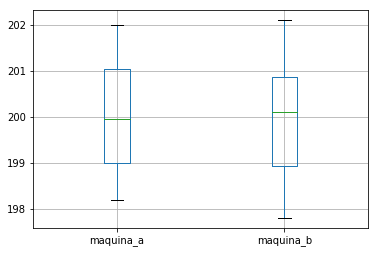

In [109]:
df.boxplot()

In [110]:
std2_a = (df['maquina_a'].std())**2
std2_b = (df['maquina_b'].std())**2
std2_a, std2_b

(1.3664642857142886, 1.3203109713487051)

In [111]:
f0 = std2_a / std2_b
f0

1.0349563969149158

In [112]:
F_alpha = f.isf(0.025,df['maquina_a'].count()-1, df['maquina_b'].count()-1) # Se usa la cola derecha por eso es f.isf() 
F_alpha

1.7169731073971102

Como 1.7169 no es mayor a 1.0349 no puedo rechazar a H0, por lo tanto la razón de varianza son iguales, por esta razón usamos la primera hipotesis de medias

In [113]:
n_a = df['maquina_a'].count()
n_b = df['maquina_b'].count()
std_a = df['maquina_a'].std()
std_b = df['maquina_b'].std()
mean_a = df['maquina_a'].mean()
mean_b = df['maquina_b'].mean()

In [114]:
sp = sqrt(((n_a-1)*std_a**2 + (n_b-1)*std_b**2)/(n_a + n_b - 2))
sp

1.159230336919666

In [115]:
t0 = (mean_a - mean_b)/(sp*sqrt((1/n_a)+(1/n_b)))

In [116]:
t(0.025, 108)

In [117]:
from scipy.stats import median_test

In [143]:
df['maquina_b'].fillna(df['maquina_a'].mean(), implace = True)
df

TypeError: fillna() got an unexpected keyword argument 'implace'

In [ ]:
median_test(list(df['maquina_a'].values), list(df['maquina_b'].values))